In [1]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("ggplot2")
library(ggplot2)
install.packages("randomForest")
library(randomForest)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘pack

In [2]:
# Instalar y cargar las bibliotecas necesarias
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Autenticarse con Google Drive
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e3fa34e68f9bc087443fcb7dcce72530&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWN2RE1yQ1MxWXdPenZZV3VJRzN1Wkl2VzZOSURaNlFmTUo0RUVpUDZJREtvU2VaZ1JjeXZ2a0tTb19EcGdXQnNoWFNvdyIsInN0YXRlIjoiZTNmYTM0ZTY4ZjliYzA4NzQ0M2ZjYjdkY2NlNzI1MzAifQ==


In [49]:
# Especificar el ID del archivo y la ruta de destino
file_id <- "https://drive.google.com/file/d/1WDRKvrZrvSlQa8qNgUCoGwEyepYNm3dz/view?usp=drivesdk"  # Reemplaza este ID con el ID de tu archivo
drive_download(as_id(file_id), path = "archivo.csv", overwrite = TRUE)

File downloaded:

• Documento de César García <id: 1WDRKvrZrvSlQa8qNgUCoGwEyepYNm3dz>

Saved locally as:

• archivo.csv



In [50]:
# Leer el archivo CSV desde la URL
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
urlMechanic <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/mechanic_antiquity.csv"
df <- read_csv("archivo.csv", show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)
df_mechanic <- read_csv(urlMechanic, show_col_types = FALSE)

In [51]:
summary(df)

   equipment        operation           wo_type           base_model       
 Min.   : 100268   Length:149066      Length:149066      Length:149066     
 1st Qu.:1023935   Class :character   Class :character   Class :character  
 Median :1078773   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1017279                                                           
 3rd Qu.:1149220                                                           
 Max.   :1169630                                                           
 problem_code       problem_desc       failure_code       failure_desc      
 Length:149066      Length:149066      Length:149066      Length:149066     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [52]:
head(df,5)

equipment,operation,wo_type,base_model,problem_code,problem_desc,failure_code,failure_desc,cause_code,cause_desc,⋯,action_desc,mechanic,date,downtime_gross,pit_coverage,real_downtime,parts_cost,repair_hours,waiting_hours,changed_pcs
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Calibration,VF2500,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,⋯,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Erick Garcia Lima,7/14/2023,0.08333333,0.08,0.003333333,$0.74,0.08333333,0,0
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC012,Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,1/17/2024,3.00000000,3.00,0.000000000,$12.50,2.00000000,1,2
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC005,Broken machine head ball joint / Rotura de biela de cabezal,⋯,Replace machine head ball joint / Reemplazar biela de cabezal,JERONIMO FUNEZ,3/18/2023,0.25000000,0.00,0.250000000,$2.67,0.25000000,0,0


**LIMPIEZA DE DATOS**

In [53]:
sapply(df, function(x) sum(is.na(x)))
#Fiabilidad suficiente para continuar con el trabajo

equipment      operation        wo_type     base_model   problem_code 
             0              0              0              0              0 
  problem_desc   failure_code   failure_desc     cause_code     cause_desc 
             0              0              0              0              0 
   action_code    action_desc       mechanic           date downtime_gross 
             0              0              0              0              0 
  pit_coverage  real_downtime     parts_cost   repair_hours  waiting_hours 
             0              0              0              0              0 
   changed_pcs 
             0

In [54]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

In [55]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [56]:
mean(df$downtime_gross < 0)

[1] 2.683375e-05

In [57]:
# Filtrar registros donde downtimeGross no sea negativo
df <- df %>%
  filter(downtime_gross >= 0)

In [58]:
mean(df$repair_hours < 0)

[1] 0

In [59]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -waiting_hours)
#Se han eliminado codigos y variables calculadas

In [60]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`wo_type` == "Corrective Maintenance")
#Colocar comentario de por qué el filtro, colocar que tecnicas pueden aplicarse y cuales no, colocar en apartado diferente

In [61]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [62]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

In [63]:
#Cambio de nombre de mecánico cuyo nombre está escrito de dos formas
df <- df %>%
  mutate(mechanic = ifelse(mechanic == "GALEAS PEREZ EDWIN ROGELIO", "Edwin Rogelio Galeas Perez", mechanic))

In [64]:
# Calcular la tabla de frecuencias de cause_desc
freq_cause_desc <- table(df$cause_desc)

# Definir umbral de baja frecuencia (por ejemplo, menos de 5 observaciones)
umbral <- 800

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_cause_desc)[freq_cause_desc < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$cause_desc[df$cause_desc %in% categorias_baja_frecuencia] <- "Otros"

In [65]:
# Calcular la tabla de frecuencias de action_desc
freq_action_desc <- table(df$action_desc)

# Definir umbral de baja frecuencia
umbral <- 800

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_action_desc)[freq_action_desc < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$action_desc[df$action_desc %in% categorias_baja_frecuencia] <- "Otros"

In [66]:
# Calcular la tabla de frecuencias de operation
freq_operation <- table(df$operation)

# Definir umbral de baja frecuencia
umbral <- 1600

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_operation)[freq_operation < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$operation[df$operation %in% categorias_baja_frecuencia] <- "Otros"

In [67]:
# Calcular la tabla de frecuencias de mechanic
freq_mechanic <- table(df$mechanic)

# Definir umbral de baja frecuencia
umbral <- 200

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_mechanic)[freq_mechanic < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$mechanic[df$mechanic %in% categorias_baja_frecuencia] <- "Otros"

In [68]:
# Calcular la tabla de frecuencias de base model
freq_base_model <- table(df$base_model)

# Definir umbral de baja frecuencia
umbral <- 657

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_base_model)[freq_base_model< umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$base_model[df$base_model %in% categorias_baja_frecuencia] <- "Otros"

In [69]:
# Calcular la tabla de frecuencias de problem_desc
freq_problem_desc <- table(df$problem_desc)

# Definir umbral de baja frecuencia
umbral <- 1000

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_problem_desc)[freq_problem_desc< umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$problem_desc[df$problem_desc %in% categorias_baja_frecuencia] <- "Otros"

In [70]:
# Calcular la tabla de frecuencias de failure_desc
freq_failure_desc <- table(df$failure_desc)

# Definir umbral de baja frecuencia
umbral <- 1000

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_failure_desc)[freq_failure_desc< umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$failure_desc[df$failure_desc %in% categorias_baja_frecuencia] <- "Otros"

In [71]:
#Convertir horas a minutos
df$downtime_gross <-df$downtime_gross*60

**ANALISIS DE VARIABLES**

In [72]:
dim(df)

[1] 135858     15

**Variable "Operación"**

In [73]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,25222,25222,0.1856497
Otros,22387,47609,0.3504321
HEM BOTTOM,15840,63449,0.4670244
JOIN PANEL,7799,71248,0.5244299
SET SLEEVE,7743,78991,0.5814233
TAPE SHOULDER,7556,86547,0.6370401
HEM AROUND,5256,91803,0.6757276
FLAT SEAM,4987,96790,0.7124350
JOIN SHOULDER,4857,101647,0.7481856


**Variable "problem_desc"**

In [74]:
# Calcular la frecuencia de problemas de maquinaria
problem_freq <- df %>%
  group_by(problem_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
problem_freq <- problem_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
problem_freq

problem_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
It sews with defect / Cose con defecto,95025,95025,0.6994435
It does not sew / No cose,31928,126953,0.9344536
Otros,4491,131444,0.9675102
It does not cut the thread / No corta el hilo,2214,133658,0.9838066
It does not cut the trim off / No corta el desperdicio,1177,134835,0.9924701
It does not cut the cloth / No corta la tela,1023,135858,1.0000000


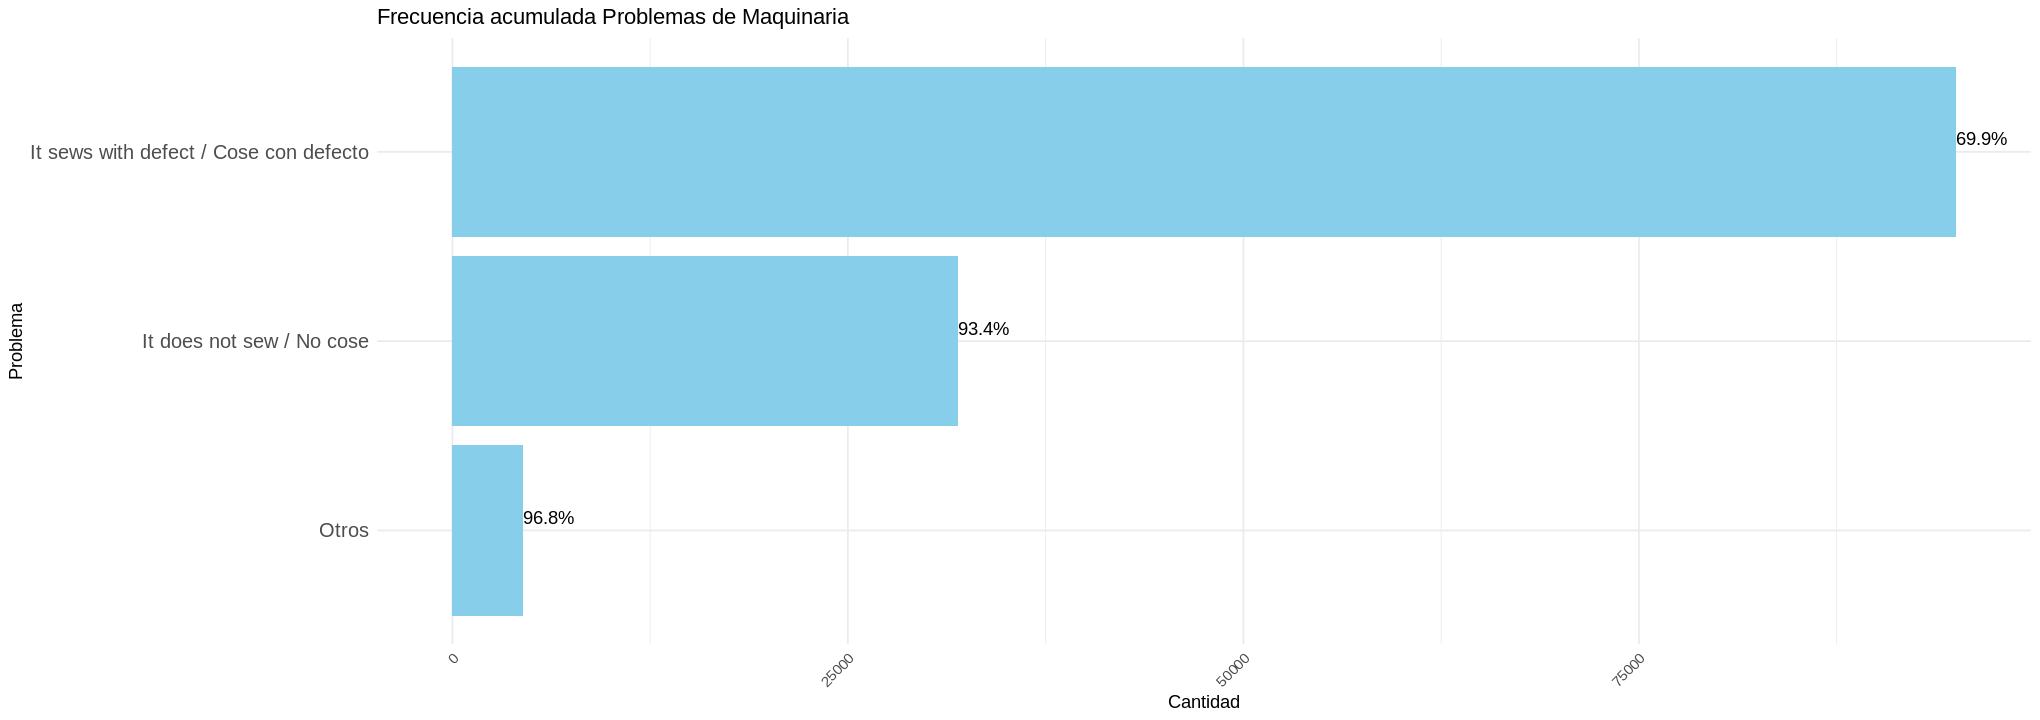

In [161]:
# Ordenar los datos por frecuencia descendente
problem_freq <- problem_freq %>%
  arrange(desc(count))

problem_freq <- problem_freq %>%
  top_n(3, count)

options(repr.plot.width=17, repr.plot.height=6)

ggplot(problem_freq, aes(y = reorder(problem_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(cum_perc * 100, 1), "%")), vjust = -0.5, hjust = 0) +
  labs(title = "Frecuencia acumulada Problemas de Maquinaria",
       y = "Problema",
       x = "Cantidad") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 12))

**Variable "failure_desc"**

In [76]:
# Calcular la frecuencia de fallos de maquinaria
failure_freq <- df %>%
  group_by(failure_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
failure_freq <- failure_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
failure_freq

failure_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Machine head failure stopping sewing / Falla cabezal dejando de coser,64019,64019,0.4712200
Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,36833,100852,0.7423339
Trim off device failure / Falla dispositivo corta desperdicio,13704,114556,0.8432039
Otros,3774,118330,0.8709829
Chain cutter failure / Falla corta cadenetas,2967,121297,0.8928219
Folder failure / Falla doblillador,2816,124113,0.9135494
Monitoring and control failure / Falla monitoreo y control,1975,126088,0.9280867
Engine failure / Falla motor,1854,127942,0.9417333
Lubrication system failure / Falla sistema de lubricación,1511,129453,0.9528552


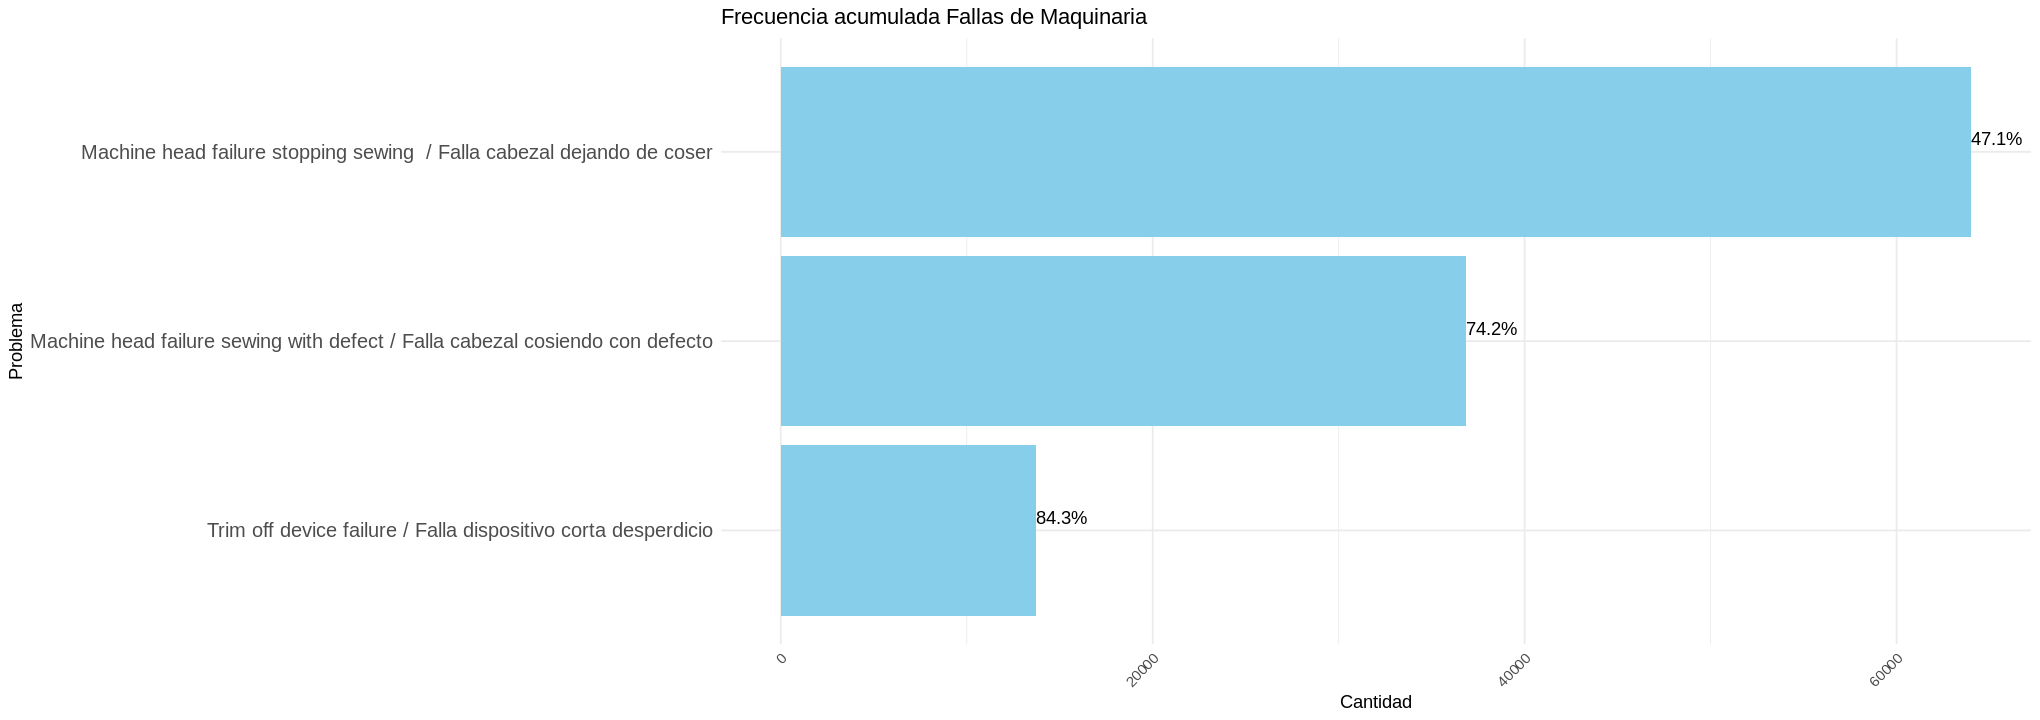

In [160]:
# Ordenar los datos por frecuencia descendente
failure_freq <- failure_freq %>%
  arrange(desc(count))

failure_freq <- failure_freq %>%
  top_n(3, count)

options(repr.plot.width=17, repr.plot.height=6)

ggplot(failure_freq, aes(y = reorder(failure_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(cum_perc * 100, 1), "%")), vjust = -0.5, hjust = 0) +  # Etiquetas de porcentaje acumulado
  labs(title = "Frecuencia acumulada Fallas de Maquinaria",
       y = "Problema",
       x = "Cantidad") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 12))

**Variable "cause_desc"**

In [78]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
cause_freq <- cause_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
cause_freq

cause_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Otros,26748,26748,0.1968820
Misadjusted machine head looper / Enlazador de cabezal desajustado,24259,51007,0.3754435
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,12994,64001,0.4710875
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,11344,75345,0.5545864
Broken machine head ball joint / Rotura de biela de cabezal,8785,84130,0.6192495
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,6193,90323,0.6648339
Misadjusted machine head teeth / Dientes de cabezal desajustados,5733,96056,0.7070323
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,5387,101443,0.7466840
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,4551,105994,0.7801822


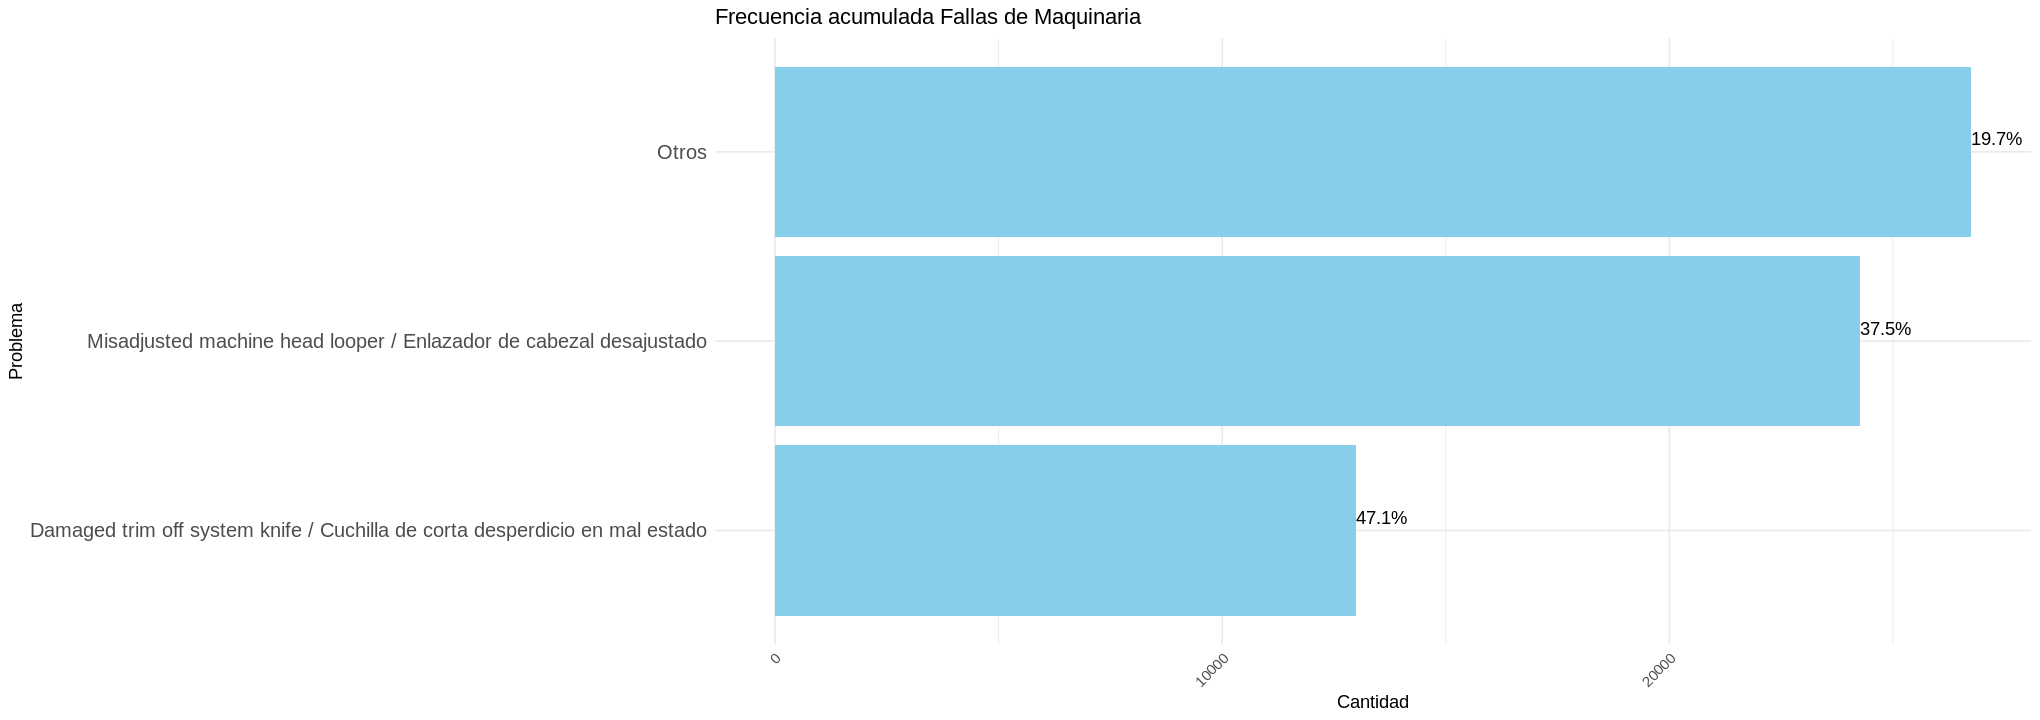

In [159]:
# Ordenar los datos por frecuencia descendente
cause_freq <- cause_freq %>%
  arrange(desc(count))

cause_freq <- cause_freq %>%
  top_n(3, count)

options(repr.plot.width=17, repr.plot.height=6)

ggplot(cause_freq, aes(y = reorder(cause_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(cum_perc * 100, 1), "%")), vjust = -0.5, hjust = 0) +  # Etiquetas de porcentaje acumulado
  labs(title = "Frecuencia acumulada Fallas de Maquinaria",
       y = "Problema",
       x = "Cantidad") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 12))

**Variable "action_desc"**

In [79]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
action_freq <- action_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
action_freq
#Grafica de distribución

action_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Otros,25800,25800,0.1899042
Adjust machine head looper / Ajustar enlazador de cabezal,18275,44075,0.3244196
Adjust machine head needle guard / Ajustar guarda aguja de cabezal,11409,55484,0.4083970
Adjust machine head teeth / Ajustar dientes de cabezal,9699,65183,0.4797877
Sharpen knife / Afilar cuchillas,9087,74270,0.5466737
Replace machine head ball joint / Reemplazar biela de cabezal,8825,83095,0.6116313
Replace machine head looper / Reemplazar enlazador de cabezal,7719,90814,0.6684479
Adjusted machine head presser foot / Ajustar prensatela de cabezal,6842,97656,0.7188093
Replace trim off knife / Reemplazar cuchilla de corta desperdicio,6205,103861,0.7644820


**Variable "mechanic"**

In [80]:
# Calcular la frecuencia de fallos resueltos por mecanicos
mechanic_freq <- df %>%
  group_by(mechanic) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
mechanic_freq <- mechanic_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
mechanic_freq

mechanic,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Otros,4011,4011,0.02952347
Antony Ulloa,3226,7237,0.05326885
Jose Manuel Perez Zepeda,3034,10271,0.07560100
Omar Maldonado,2768,13039,0.09597521
Erick Garcia Lima,2533,15572,0.11461968
Ronald Antonio Herrera,2434,18006,0.13253544
Edwin Colindres,2389,20395,0.15011998
DIEGO CUELLAR,2247,22642,0.16665931
Carlos Alberto Alfaro Salamanca,2234,24876,0.18310295


**Variable "repair_hours"**

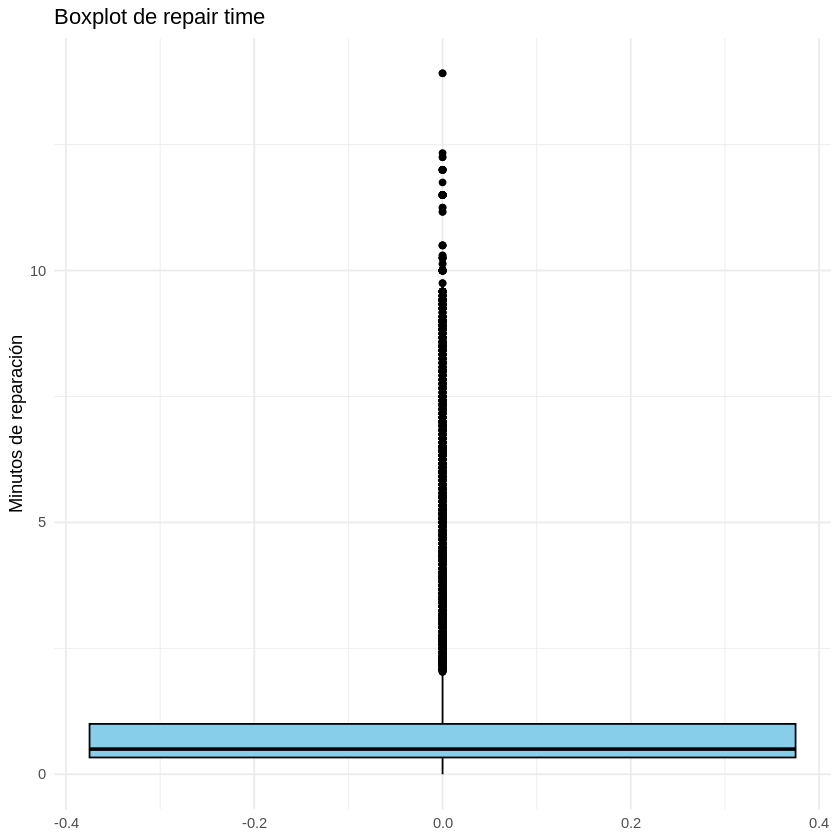

In [81]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de repair time',
       y = 'Minutos de reparación') +
  theme_minimal()

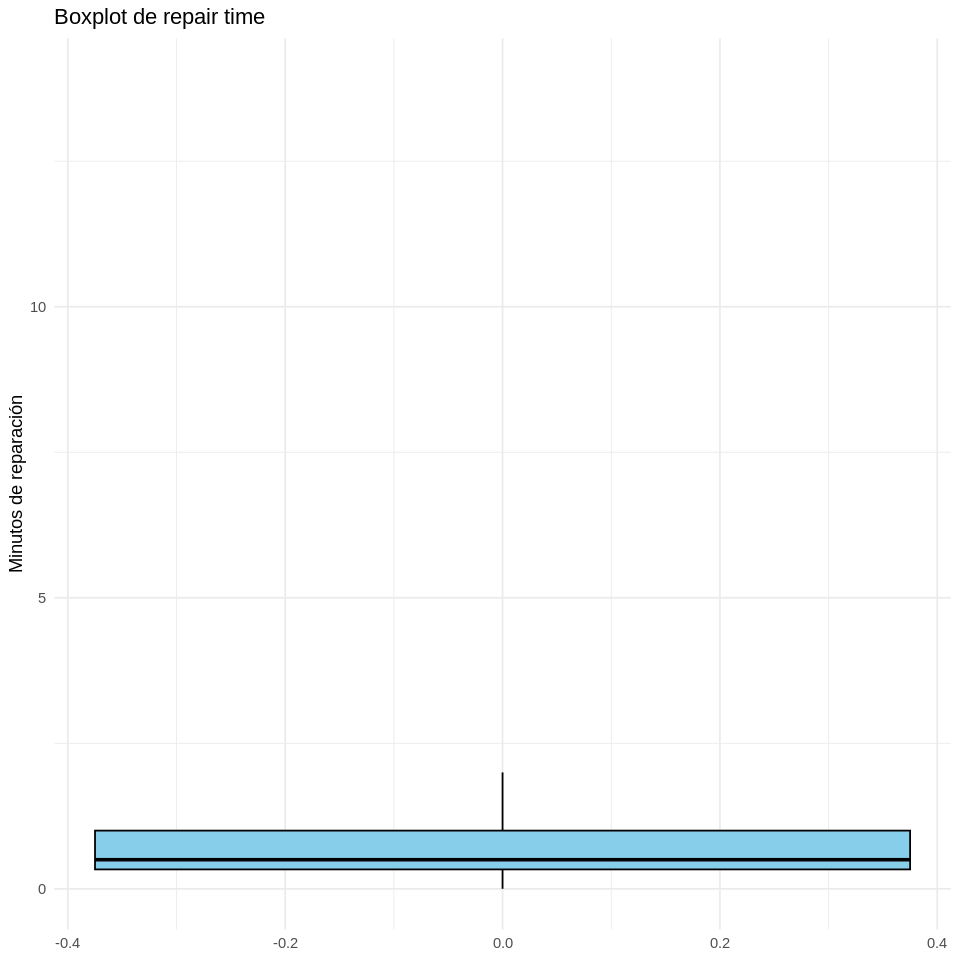

In [163]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA) +
  labs(title = 'Boxplot de repair time',
       y = 'Minutos de reparación') +
  theme_minimal()

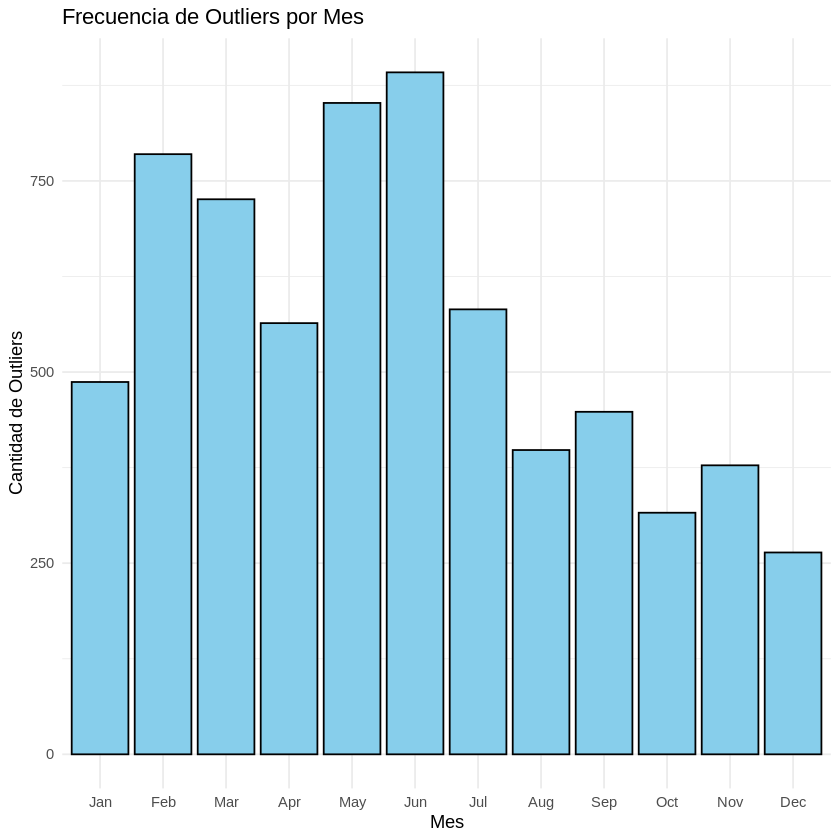

In [83]:
# Calcular los outliers
outlier_threshold <- quantile(df$repair_hours, 0.95)

# Identificar outliers
df$outlier <- ifelse(df$repair_hours > outlier_threshold, TRUE, FALSE)

# Convertir Date a formato de fecha
df$date <- as.Date(df$date)

# Agrupar por mes y contar la frecuencia de outliers
df_outliers <- df %>%
  mutate(Month = month(date, label = TRUE)) %>%
  group_by(Month) %>%
  summarise(Outliers = sum(outlier))

# Crear un gráfico de barras de la frecuencia de outliers por mes
ggplot(df_outliers, aes(x = Month, y = Outliers)) +
  geom_bar(stat = "identity", fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Outliers por Mes',
       x = 'Mes',
       y = 'Cantidad de Outliers') +
  theme_minimal()

**Variable "parts cost"**

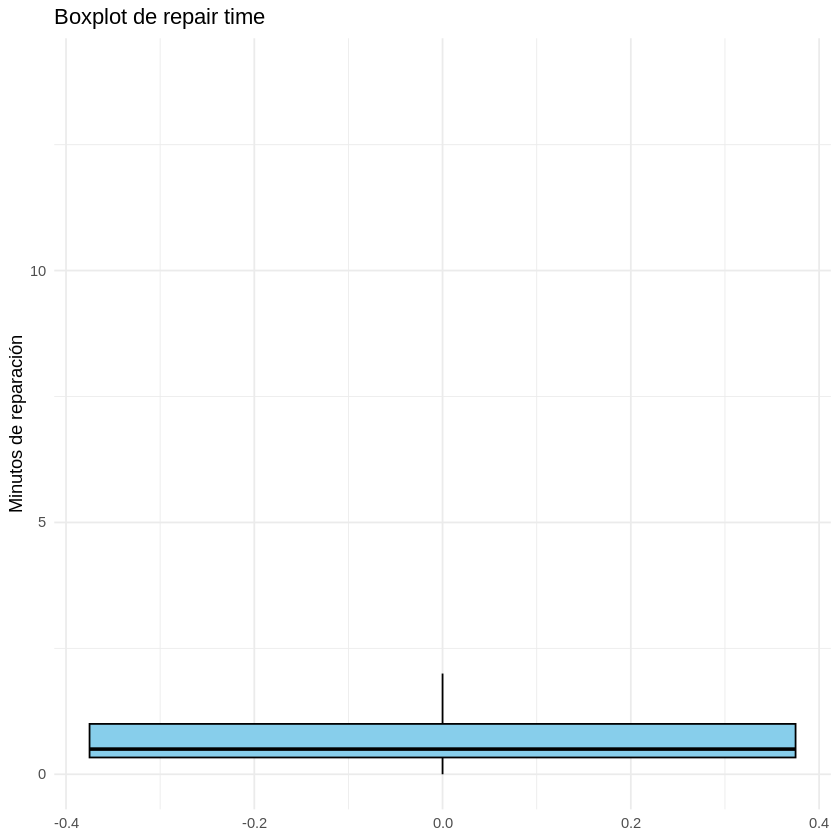

In [100]:
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA) +
  labs(title = 'Boxplot de repair time',
       y = 'Minutos de reparación') +
  theme_minimal() +
  ylim(0, max(df$repair_hours, na.rm = TRUE))

In [ ]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo') +
  theme_minimal()

**ANALISIS DE VARIABLE OBJETIVO "DOWNTIME GROSS"**

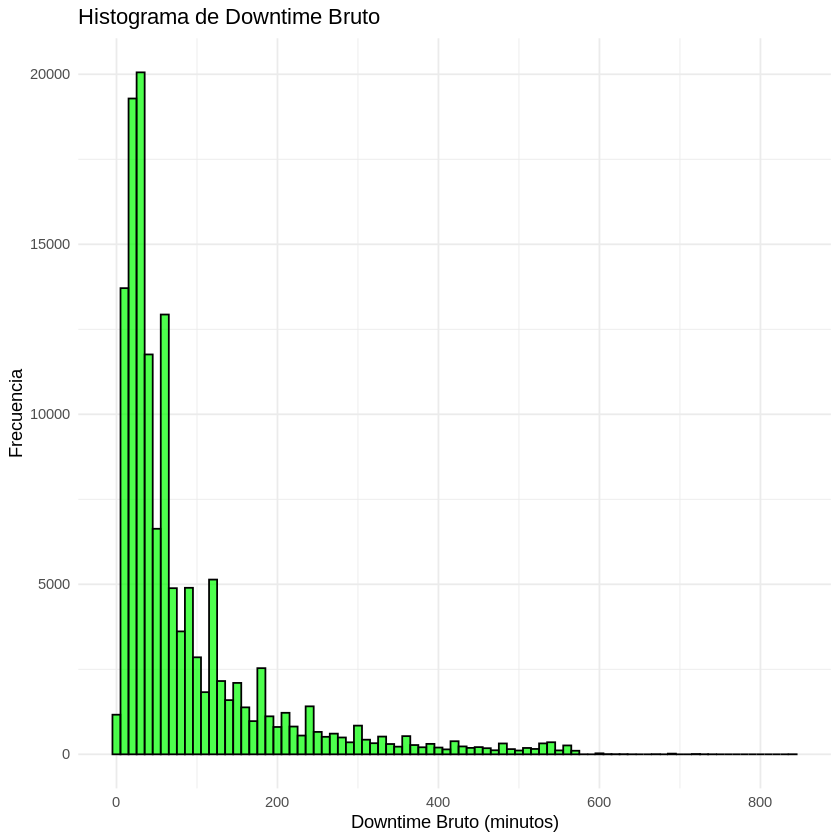

In [84]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 10, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (minutos)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)
#Hacerlo más grande

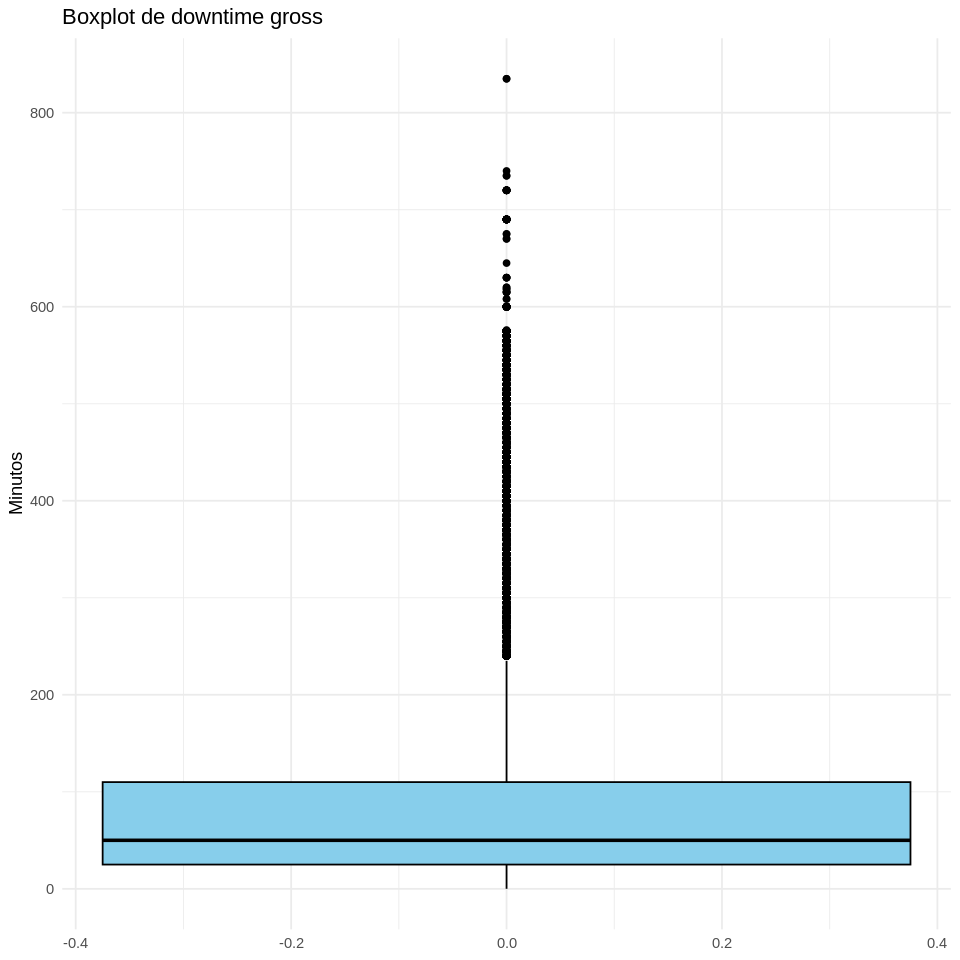

In [164]:
# Crear el boxplot de downtime gross
ggplot(df, aes(y = downtime_gross)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de downtime gross',
       y = 'Minutos') +
  theme_minimal()

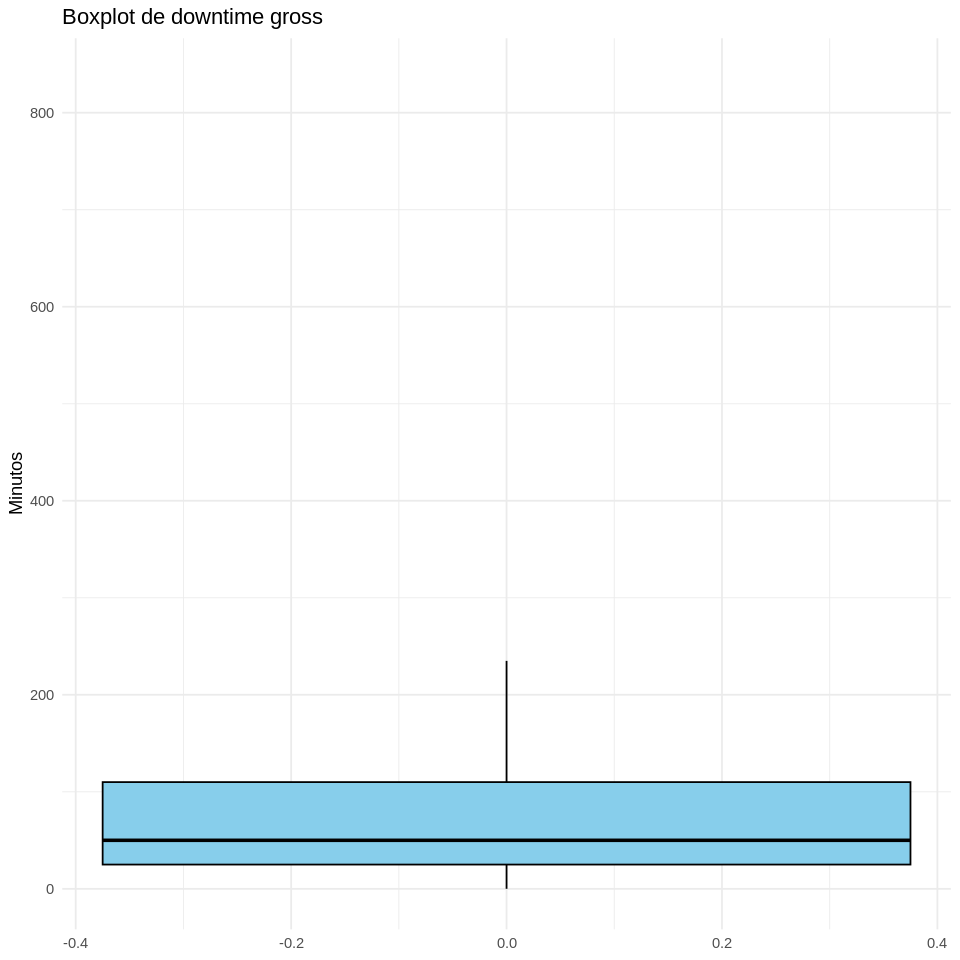

In [165]:
# Crear el boxplot de downtime gross
ggplot(df, aes(y = downtime_gross)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA) +
  labs(title = 'Boxplot de downtime gross',
       y = 'Minutos') +
  theme_minimal()

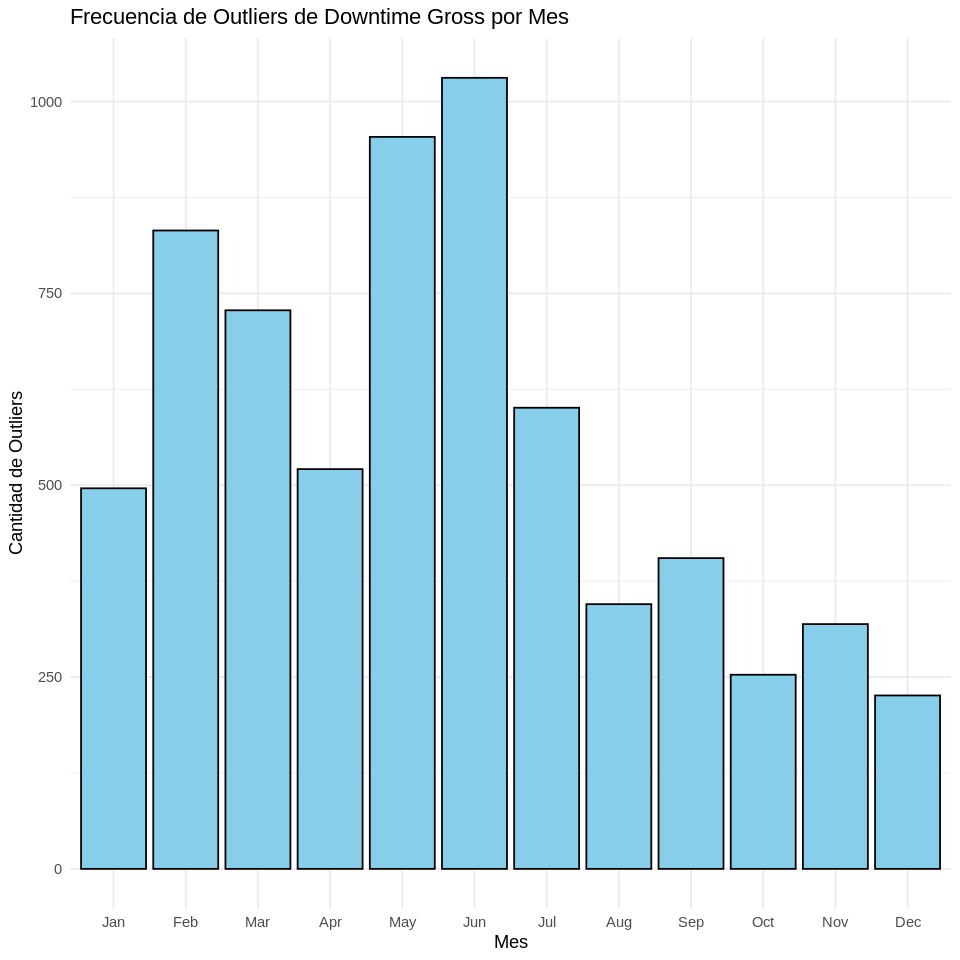

In [166]:
outlier_threshold <- quantile(df$downtime_gross, 0.95)

# Identificar outliers
df$outlier <- ifelse(df$downtime_gross > outlier_threshold, TRUE, FALSE)

# Convertir Date a formato de fecha
df$date <- as.Date(df$date)

# Agrupar por mes y contar la frecuencia de outliers
df_outliers <- df %>%
  mutate(Month = month(date, label = TRUE)) %>%
  group_by(Month) %>%
  summarise(Outliers = sum(outlier))

# Crear un gráfico de barras de la frecuencia de outliers por mes
ggplot(df_outliers, aes(x = Month, y = Outliers)) +
  geom_bar(stat = "identity", fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Outliers de Downtime Gross por Mes',
       x = 'Mes',
       y = 'Cantidad de Outliers') +
  theme_minimal()

**MODELO DE REGRESION LINEAL INICIAL PARA PREDECIR DOWNTIME**



In [167]:
df <- select(df, -wo_type)
#Comparar con un glm

In [168]:
head(df,5)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,repair_hours,changed_pcs,Days_Between_Failures,outlier
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1011144,HEM SLEEVE,VC2700,It does not cut the trim off / No corta el desperdicio,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.00,0.1666667,0,2,FALSE
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,1.0000000,1,2,FALSE
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,1.0000000,1,0,FALSE
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,RAMON VILLANUEVA,2023-01-03,30,60.69,0.5000000,1,2,FALSE
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,RAMON VILLANUEVA,2023-01-03,30,60.69,0.5000000,1,0,FALSE


In [169]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data1 <- df[trainIndex,]

# Crear conjunto de prueba
test_data1 <- df[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data1), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data1), "\n")

Dimensiones del conjunto de entrenamiento:  95102 15 
Dimensiones del conjunto de prueba:  40756 15 


In [170]:
# Inicializar y ajustar el modelo de regresión lineal
#Dividir en entrenamiento, test, validación por ejemplo 70,20,10
model1 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -Days_Between_Failures -date -changed_pcs, data = train_data1)
# Resumen del modelo
summary(model1)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - Days_Between_Failures - date - changed_pcs, 
    data = train_data1)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 61.329194
operationBIND LEG                                                                            0.313122
operationCLOSE SLEEVE                                                                        8.364028
operationFLAT LOCK                                                                         -12.731265
operationFLAT SEAM                                                                          -5.081947
operationHEM AROUND                                                                          2.245936
operationHEM BOTTOM                                                                         -5.605522
operation

In [171]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model1, newdata = test_data1)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data1$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  59.58153 
Test MAE:  43.31577 
Test R-squared:  0.653424 


**CALCULO DE VARIABLES PARA MEJORA DEL AJUSTE**

In [172]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [173]:
# Calcular la mediana de tiempo de reparación
df <- df %>%
  group_by(equipment) %>%
  mutate(Median_Repair_Time = median(repair_hours, na.rm = TRUE))

In [174]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

In [175]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data2 <- df[trainIndex,]

# Crear conjunto de prueba
test_data2 <- df[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data2), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data2), "\n")

Dimensiones del conjunto de entrenamiento:  95102 18 
Dimensiones del conjunto de prueba:  40756 18 


**MODELO DE REGRESION LINEAL PARA PREDECIR DOWNTIME CON MAS VARIABLES**

In [176]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -changed_pcs, data = train_data2)
# Resumen del modelo
summary(model2)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - changed_pcs, data = train_data2)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 4.242e+01
operationBIND LEG                                                                          -1.737e+00
operationCLOSE SLEEVE                                                                       7.763e+00
operationFLAT LOCK                                                                         -1.185e+01
operationFLAT SEAM                                                                         -7.374e+00
operationHEM AROUND                                                                         2.939e+00
operationHEM BOTTOM                                                                        -6.079e+00
operationHEM SLEEVE                   

In [177]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model2, newdata = test_data2)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data2$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  58.7193 
Test MAE:  42.40528 
Test R-squared:  0.6633823 


**MODELO AGREGANDO LA VARIABLE "MACHINE AGE"**

In [178]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [179]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [180]:
head(df_merged,3)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,repair_hours,changed_pcs,Days_Between_Failures,outlier,Cumulative_Failure_Count,Median_Repair_Time,Cumulative_Maintenance_Cost,Age
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,It does not cut the trim off / No corta el desperdicio,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.0,0.1666667,0,2,FALSE,1,0.5,51.0,26
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,1.0000000,1,2,FALSE,1,1.0,19.2,23
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,1.0000000,1,0,FALSE,2,1.0,38.4,23


In [181]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df_merged$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data3 <- df_merged[trainIndex,]

# Crear conjunto de prueba
test_data3 <- df_merged[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data3), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data3), "\n")

Dimensiones del conjunto de entrenamiento:  95102 19 
Dimensiones del conjunto de prueba:  40756 19 


In [182]:
# Inicializar y ajustar el modelo de regresión lineal
model3 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -changed_pcs, data = train_data3)
# Resumen del modelo
summary(model3)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - changed_pcs, data = train_data3)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 3.639e+01
operationBIND LEG                                                                          -1.426e+00
operationCLOSE SLEEVE                                                                       8.282e+00
operationFLAT LOCK                                                                         -1.093e+01
operationFLAT SEAM                                                                         -6.661e+00
operationHEM AROUND                                                                         2.975e+00
operationHEM BOTTOM                                                                        -5.900e+00
operationHEM SLEEVE                   

In [183]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model3, newdata = test_data3)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data3$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  58.70829 
Test MAE:  42.40129 
Test R-squared:  0.6635085 


**MODELO AGREGANDO LA VARIABLE "MECHANIC ANTIQUITY"**

In [184]:
# Primero, calcula la media de antiquity
mean_antiquity <- mean(df_mechanic$antiquity, na.rm = TRUE)

# Realiza el left join y luego reemplaza los NA en antiquity con la media calculada
df_merged2 <- df_merged %>%
  left_join(df_mechanic %>% select(mechanic, antiquity), by = "mechanic") %>%
  mutate(antiquity = ifelse(is.na(antiquity), mean_antiquity, antiquity))

In [185]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df_merged2$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data4 <- df_merged2[trainIndex,]

# Crear conjunto de prueba
test_data4 <- df_merged2[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data4), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data4), "\n")

Dimensiones del conjunto de entrenamiento:  95102 20 
Dimensiones del conjunto de prueba:  40756 20 


In [186]:
# Inicializar y ajustar el modelo de regresión lineal
model4 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -changed_pcs, data = train_data4)
# Resumen del modelo
summary(model4)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - changed_pcs, data = train_data4)

Coefficients: (1 not defined because of singularities)
                                                                                             Estimate
(Intercept)                                                                                 3.639e+01
operationBIND LEG                                                                          -1.426e+00
operationCLOSE SLEEVE                                                                       8.282e+00
operationFLAT LOCK                                                                         -1.093e+01
operationFLAT SEAM                                                                         -6.661e+00
operationHEM AROUND                                                                         2.975e+00
operationHEM BOTTOM                                                                        -5.900e+

In [187]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model4, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  58.70829 
Test MAE:  42.40129 
Test R-squared:  0.6635085 


**AGREGANDO LA VARIABLE "CHANGED_PCS"**

In [188]:
# Inicializar y ajustar el modelo de regresión lineal
model5 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -antiquity, data = train_data4)
# Resumen del modelo
summary(model5)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - antiquity, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 5.169e+01
operationBIND LEG                                                                          -6.864e+00
operationCLOSE SLEEVE                                                                       6.208e+00
operationFLAT LOCK                                                                         -1.187e+01
operationFLAT SEAM                                                                         -7.831e+00
operationHEM AROUND                                                                        -3.214e-01
operationHEM BOTTOM                                                                        -1.018e+01
operationHEM SLEEVE                     

In [189]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model5, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  48.54344 
Test MAE:  32.60229 
Test R-squared:  0.7699426 


**IMPLEMENTACION DE FRONTWARD**

In [190]:
sapply(df_merged2, function(x) sum(is.na(x)))

equipment                   operation 
                          0                           0 
                 base_model                problem_desc 
                          0                           0 
               failure_desc                  cause_desc 
                          0                           0 
                action_desc                    mechanic 
                          0                           0 
                       date              downtime_gross 
                          0                           0 
                 parts_cost                repair_hours 
                          0                           0 
                changed_pcs       Days_Between_Failures 
                          0                           0 
                    outlier    Cumulative_Failure_Count 
                          0                           0 
         Median_Repair_Time Cumulative_Maintenance_Cost 
                          0                           0 
                        Age                   antiquity 
                          0                           0

In [191]:
# Realizar backward elimination
model_null <- lm(downtime_gross ~ 1, data = train_data4)
model_forward <- step(model_null,
                      scope = list(lower = model_null, upper = model5),
                      direction = "forward")
model_forward$anova

Start:  AIC=879711.5
downtime_gross ~ 1

                               Df Sum of Sq       RSS    AIC
+ outlier                       1 580647776 409013892 795680
+ changed_pcs                   1 498970840 490690828 812995
+ mechanic                    142 156262291 833399377 863652
+ Median_Repair_Time            1  96575600 893086069 869948
+ base_model                   38  49427803 940233866 874915
+ operation                    18  48538722 941122947 874965
+ action_desc                  30  27654521 962007147 877076
+ problem_desc                  5  25223504 964438164 877266
+ cause_desc                   29  25593971 964067698 877278
+ failure_desc                 13  13327482 976334187 878448
+ parts_cost                    1   8678189 980983479 878876
+ Age                           1   5851076 983810593 879150
+ Days_Between_Failures         1   3854295 985807374 879342
+ Cumulative_Maintenance_Cost   1   3412485 986249184 879385
+ Cumulative_Failure_Count      1   1147678 

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,95101,989661669,879711.5
+ outlier,-1,5.806478e+08,95100,409013892,795680.1
+ changed_pcs,-1,1.427978e+08,95099,266216078,754841.4
+ mechanic,-142,3.542209e+07,94957,230793991,741546.4
+ Median_Repair_Time,-1,1.103325e+06,94956,229690666,741092.7
+ operation,-18,9.130443e+05,94938,228777622,740749.9
+ cause_desc,-29,5.186591e+05,94909,228258963,740592.1
+ Days_Between_Failures,-1,1.758529e+05,94908,228083110,740520.8
+ problem_desc,-5,1.624631e+05,94903,227920647,740463.0


In [192]:
formula = as.formula("downtime_gross ~ changed_pcs + mechanic + operation + Median_Repair_Time +
    cause_desc + Cumulative_Maintenance_Cost + problem_desc +
    failure_desc + base_model + action_desc + Days_Between_Failures +
    Age + Cumulative_Failure_Count")

In [193]:
# Inicializar y ajustar el modelo de regresión lineal
model6 <- glm(formula = formula, data = train_data4)
# Resumen del modelo
summary(model6)


Call:
glm(formula = formula, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 8.746e+01
changed_pcs                                                                                 5.381e+01
mechanicAdalberto Jeremias Rodriguez Zometa                                                -3.652e+01
mechanicAlfonso Escobar                                                                    -4.939e+01
mechanicAngel Mex                                                                          -4.261e+01
mechanicAnthony Murillo                                                                    -3.761e+01
mechanicAntony Ulloa                                                                       -3.317e+01
mechanicCain Alfredo Ramirez                                                               -1.941e+00
mechanicCarlos Al

**MODELO RANDOM FOREST**

In [ ]:
# Entrenar el modelo de Random Forest
model_rf <- randomForest(downtime_gross~. -equipment -downtime_gross -repair_hours -date -antiquity, data = train_data4, importance = TRUE)

# Ver el resumen del modelo
print(model_rf)

In [ ]:
# Hacer predicciones en el conjunto de prueba
predictions <- predict(model_rf, newdata = test_data4)

# Calcular el Error Cuadrático Medio (MSE)
mse <- mean((test_data4$downtime_gross - predictions)^2)
print(paste("MSE:", mse))

# Calcular el Coeficiente de Determinación (R^2)
r_squared <- 1 - (sum((test_data4$downtime_gross - predictions)^2) / sum((test_data4$downtime_gross - mean(test_data4$downtime_gross))^2))
print(paste("R^2:", r_squared))

In [ ]:
residuals <- test_data4$downtime_gross - predictions

In [ ]:
# Crear el histograma de los residuales
hist(residuals,
     main = "Histogram of Residuals",
     xlab = "Residuals",
     breaks = 30,
     col = "gray")

In [ ]:
# Ver la importancia de las variables
importance(model_rf)
varImpPlot(model_rf)